# Clinical Decision Support System

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploring the best machine learning model for this problem</a></li>
<li><a href="#test">Test the best model</a></li>    
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction
### This data set contains informations about 4920 paient, It includes 132 columns of symptoms and 1 column the diagnosed disease ,In the end of this project we will be able to predict the dignosis from the enterd symptoms.

In [24]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans

<a id='wrangling'></a>
## Data Wrangling

### In this section of the report, I will load in the data, check for cleanliness, and then trim and clean MY dataset for analysis.

### General Properties

In [25]:
# Importing the dataset
dataset = pd.read_csv('data.csv')
dataset.head(5)

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection


In [26]:
# Data informations
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4920 entries, 0 to 4919
Columns: 133 entries, itching to prognosis
dtypes: int64(132), object(1)
memory usage: 5.0+ MB


In [27]:
#Describtion of dataset 
dataset.describe()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,pus_filled_pimples,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze
count,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,...,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000
mean,0.137805,0.159756,0.021951,0.045122,0.021951,0.162195,0.139024,0.045122,0.045122,0.021951,...,0.021951,0.021951,0.021951,0.023171,0.023171,0.023171,0.023171,0.023171,0.023171,0.023171
std,0.344730,0.366417,0.146539,0.207593,0.146539,0.368667,0.346007,0.207593,0.207593,0.146539,...,0.146539,0.146539,0.146539,0.150461,0.150461,0.150461,0.150461,0.150461,0.150461,0.150461
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [28]:
dataset.mean().sort_values()

C:\Users\youss\AppData\Local\Temp/ipykernel_2468/772329534.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  dataset.mean().sort_values()


fluid_overload            0.000000
foul_smell_of urine       0.020732
sunken_eyes               0.021951
swollen_blood_vessels     0.021951
extra_marital_contacts    0.021951
                            ...   
nausea                    0.232927
loss_of_appetite          0.234146
high_fever                0.276829
vomiting                  0.389024
fatigue                   0.392683
Length: 132, dtype: float64

In [29]:
#Shape of dataset
dataset.shape

(4920, 133)

### Data Cleaning 
#### -Dropping the null values
#### -Dropping unchangable column
#### -Dropping duplicates

In [30]:
# Count of null values in each column 
dataset.isnull().sum().sort_values()

itching                 0
irritability            0
depression              0
toxic_look_(typhos)     0
internal_itching        0
                       ..
pain_behind_the_eyes    0
loss_of_appetite        0
nausea                  0
malaise                 0
prognosis               0
Length: 133, dtype: int64

In [31]:
#Drop zeros column and print new shape
dataset.drop(["fluid_overload"], axis=1, inplace = True)
dataset.shape

(4920, 132)

In [32]:
# Drop duplicates
print("Number of duplicated recordes is : {}".format(dataset.duplicated().sum()))
dataset.drop_duplicates(inplace=True)
dataset.shape

Number of duplicated recordes is : 4616


(304, 132)

### Data Visualization

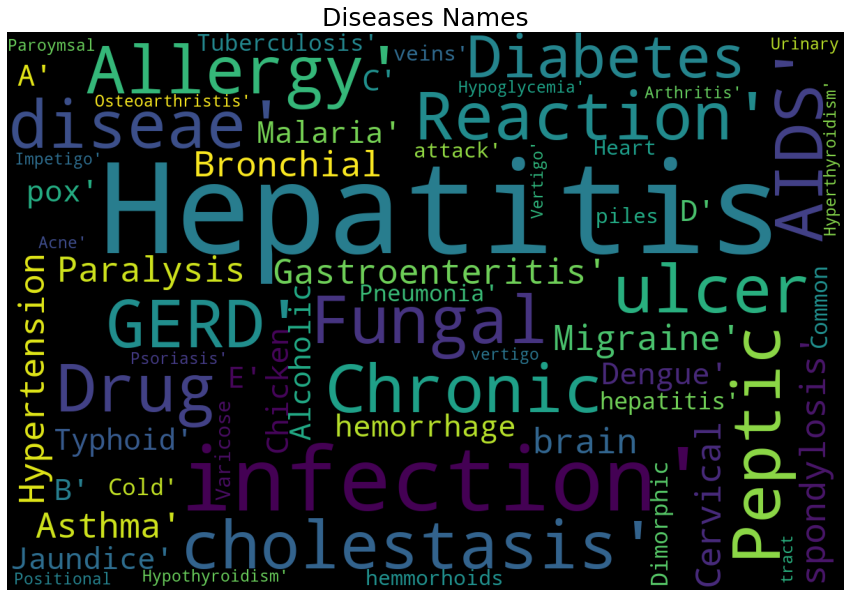

In [51]:
from wordcloud import WordCloud

wordcloud = WordCloud(background_color = 'black', width = 1200, height = 800).generate(str(dataset["prognosis"].unique()))

plt.rcParams['figure.figsize'] = (15, 15)
plt.title('Diseases Names', fontsize = 25)
print(wordcloud)
plt.axis('off')
plt.imshow(wordcloud)
plt.show()

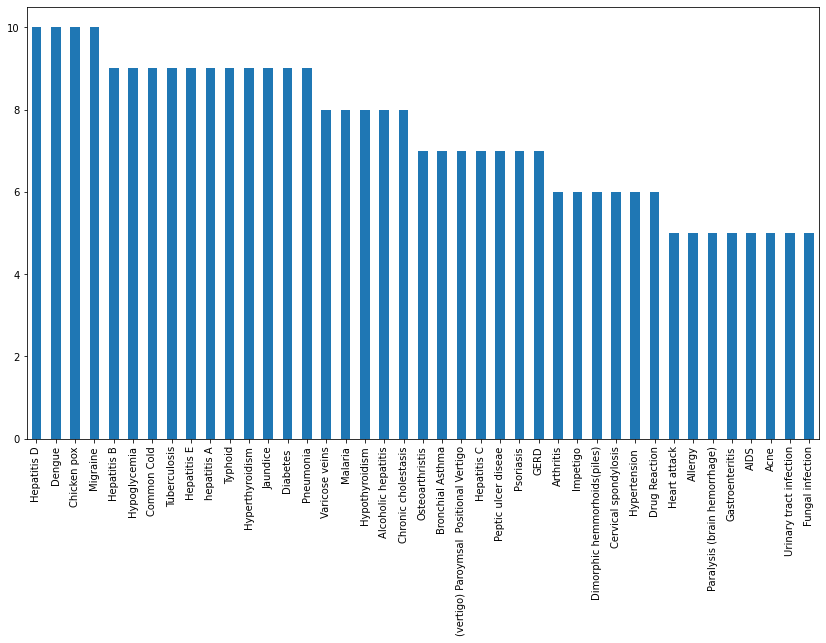

In [33]:
#as we can see each no. diseases having the same percentage through bar chart
plt.figure(figsize=(10,6))
dataset['prognosis'].value_counts().plot.bar()
plt.subplots_adjust(left = 0.9, right = 2 , top = 2, bottom = 1)
plt.show();

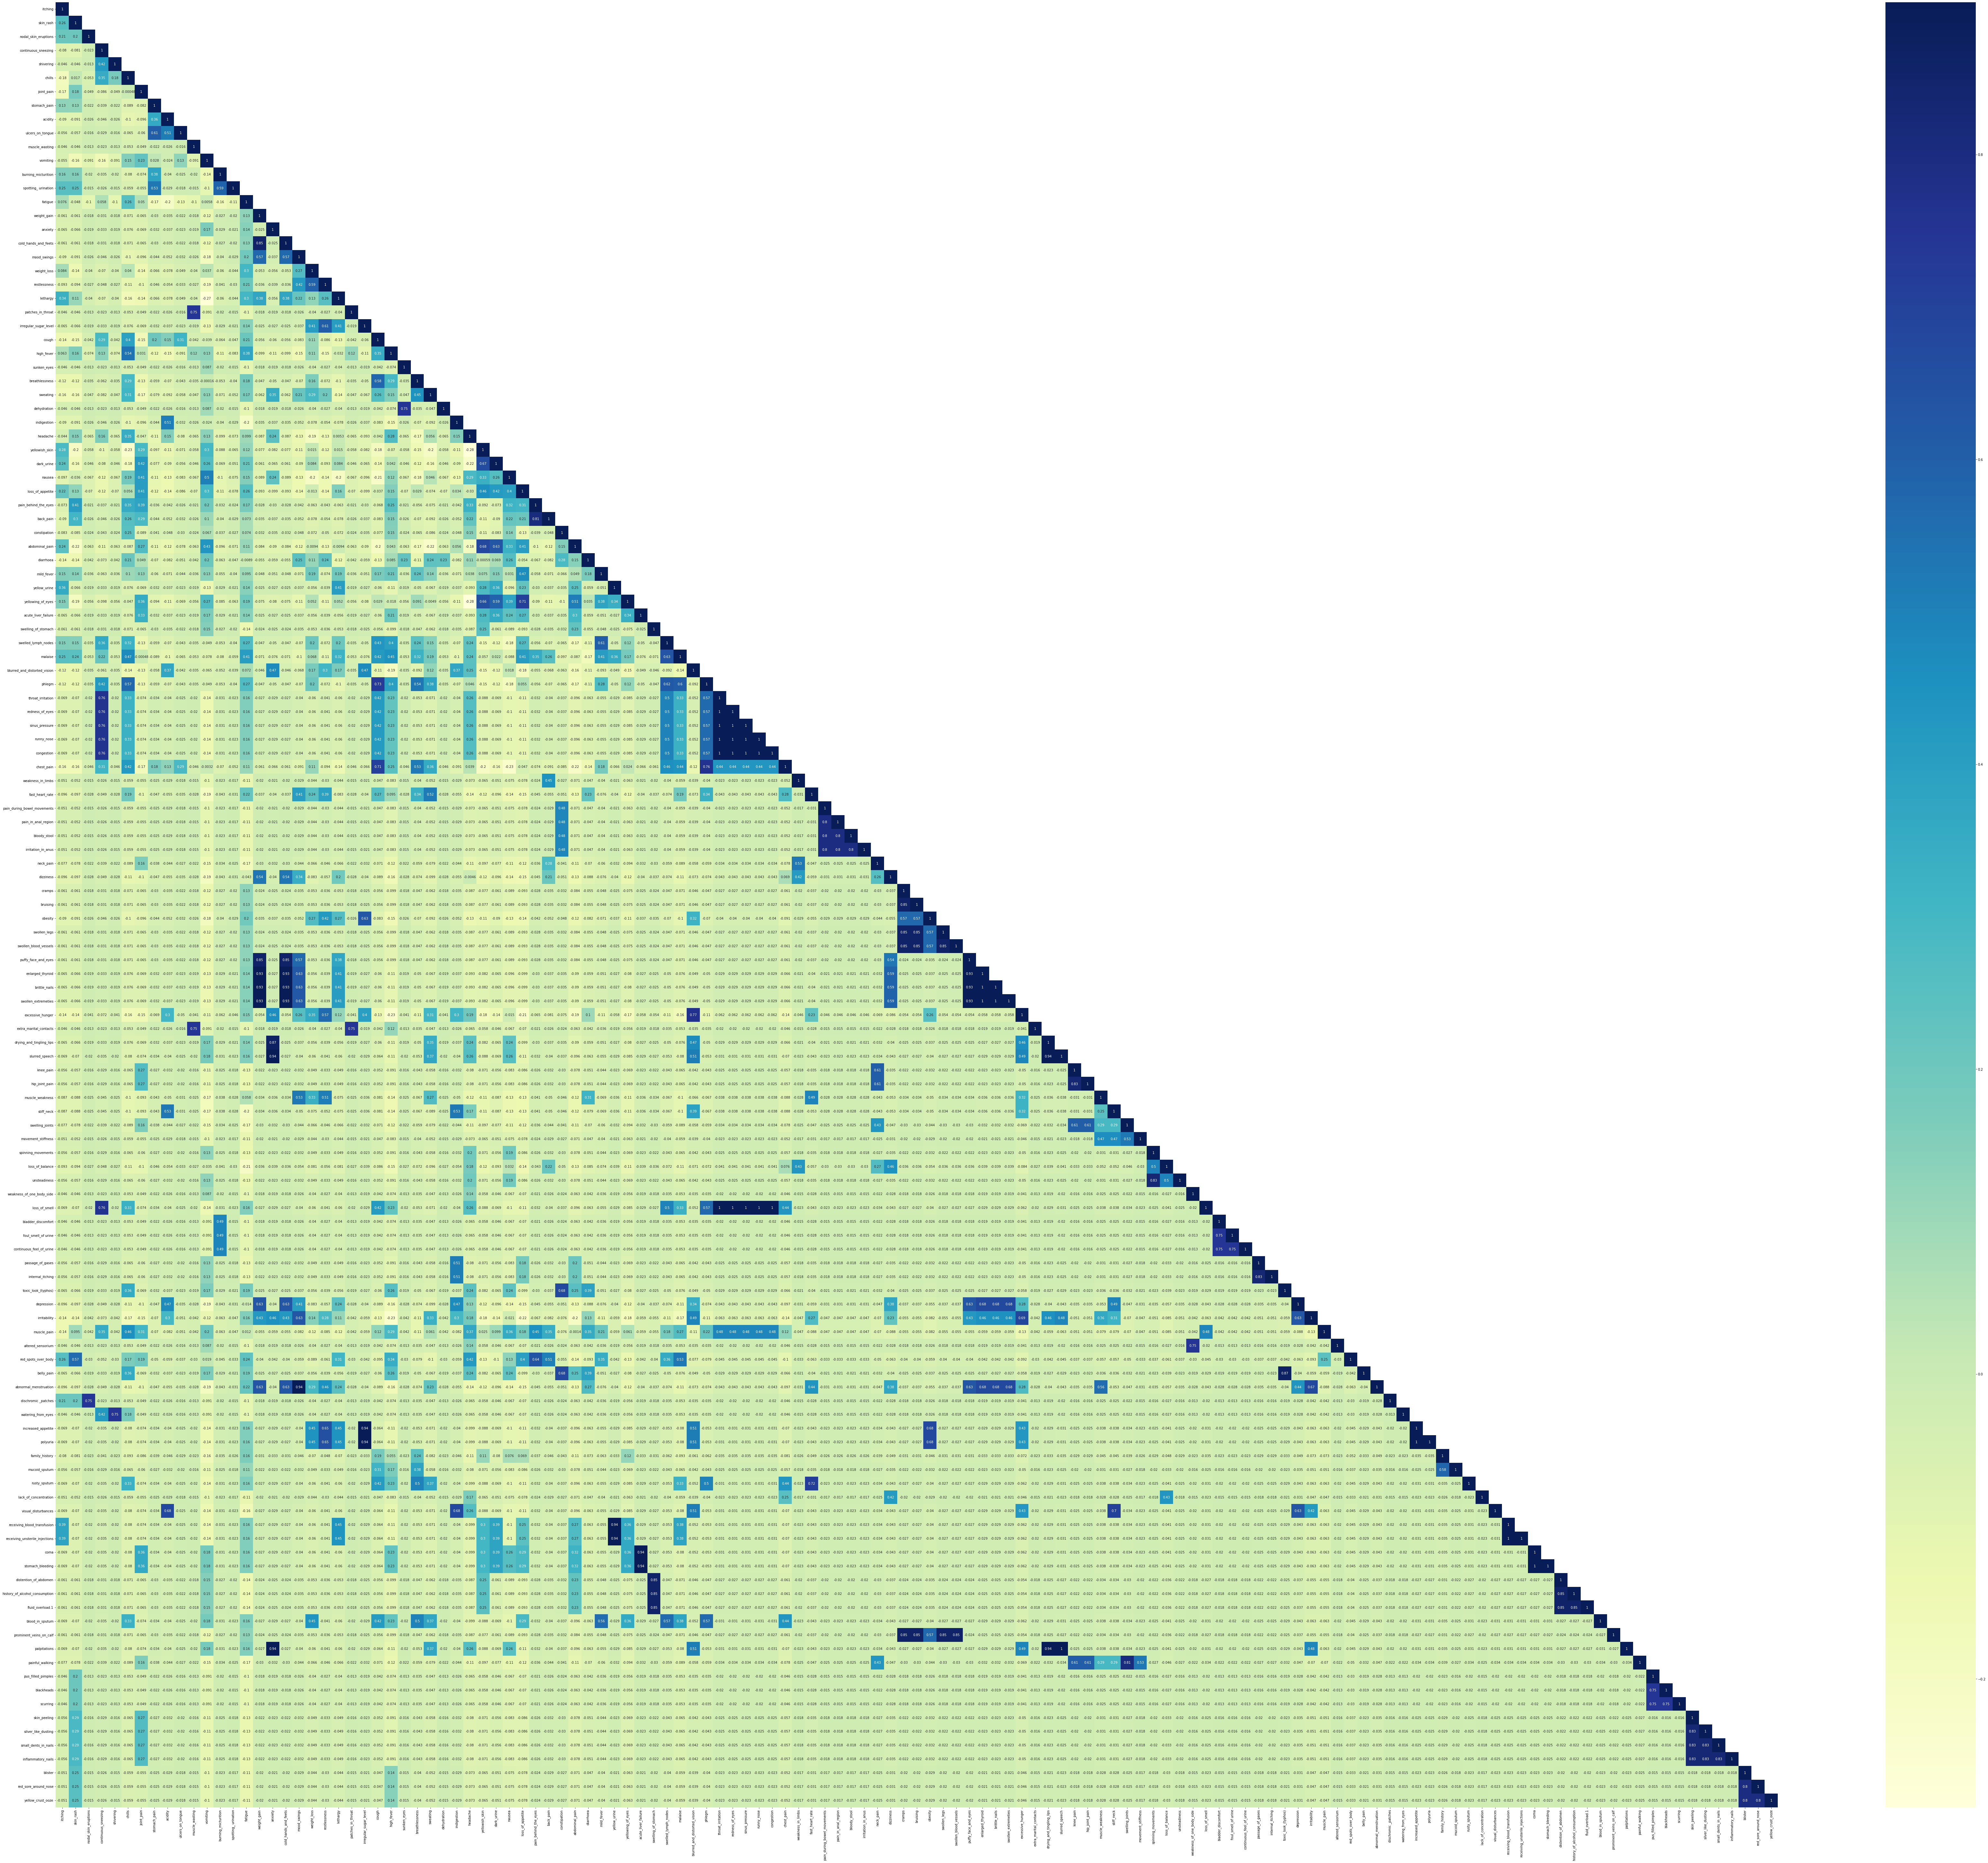

In [34]:
#checking the relationship between the variables by applying the correlation 
corr = dataset.corr()
mask = np.array(corr)
mask[np.tril_indices_from(mask)] = False
plt.subplots_adjust(left = 0.5, right = 16 , top = 20, bottom = 0.5)
sns.heatmap(corr, mask=mask,vmax=.9, square=False,annot=True, cmap="YlGnBu")
plt.show()

<a id='eda'></a>
## Data Exploration

### 1) is the unsupervised machine learning model can be used in this problem?
### 2) What is the best machine learning model for this problem?

### Splitting data

In [35]:
# Splitting data into x,y
X = dataset.iloc[: , :-1].values
y = dataset.iloc[: , -1].values

In [36]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

### KNN model

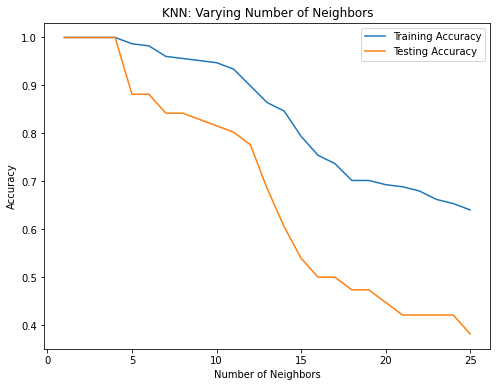

In [37]:
train_accuracies = {}
test_accuracies = {}
neighbors = np.arange(1, 26)
for neighbor in neighbors:
    knn = KNeighborsClassifier(n_neighbors=neighbor)
    knn.fit(X_train, y_train)
    train_accuracies[neighbor] = knn.score(X_train, y_train)
    test_accuracies[neighbor] = knn.score(X_test, y_test)
    
plt.figure(figsize=(8, 6))
plt.title("KNN: Varying Number of Neighbors")
plt.plot(neighbors, train_accuracies.values(), label="Training Accuracy")
plt.plot(neighbors, test_accuracies.values(), label="Testing Accuracy")
plt.legend()
plt.xlabel("Number of Neighbors")
plt.ylabel("Accuracy")
plt.show()    

In [38]:
# Training the K-NN model on the Training set
# , metric = 'minkowski', p = 2
from sklearn.neighbors import KNeighborsClassifier
KNN_classifier = KNeighborsClassifier(n_neighbors = 3, metric = 'minkowski', p = 2)
KNN_classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred_KNN = KNN_classifier.predict(X_test)

# Accuracy score
from sklearn.metrics import accuracy_score
KNN_acc=accuracy_score(y_test,y_pred_KNN)
print("Accuracy of KNN is : {:.2f} ".format(KNN_acc))

Accuracy of KNN is : 1.00 


### Decision Tree model

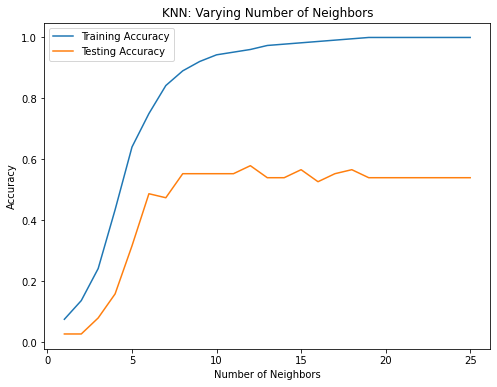

In [57]:
train_accuracies = {}
test_accuracies = {}
depth = np.arange(1, 26)
for k in depth:
    DT_classifier = DecisionTreeClassifier(criterion = 'entropy',max_depth=k, random_state = 0)
    DT_classifier.fit(X_train, y_train)
    train_accuracies[k] = DT_classifier.score(X_train, y_train)
    test_accuracies[k] = DT_classifier.score(X_test, y_test)
    
plt.figure(figsize=(8, 6))
plt.title("KNN: Varying Number of Neighbors")
plt.plot(depth, train_accuracies.values(), label="Training Accuracy")
plt.plot(depth, test_accuracies.values(), label="Testing Accuracy")
plt.legend()
plt.xlabel("Number of Neighbors")
plt.ylabel("Accuracy")
plt.show()    

In [55]:
# Training the Decision Tree Classification model on the Training set
from sklearn.tree import DecisionTreeClassifier
DT_classifier = DecisionTreeClassifier(criterion = 'entropy',max_depth=12, random_state = 0)
DT_classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred_DT = DT_classifier.predict(X_test)

# Accuracy score
from sklearn.metrics import accuracy_score
desision_tree_acc=accuracy_score(y_test,y_pred_DT)
print("Accuracy of Decision Tree is : {:.2f} ".format(desision_tree_acc))

Accuracy of Decision Tree is : 0.58 


### Naive Bayes model

In [40]:
# Training the Naive Bayes model on the Training set
from sklearn.naive_bayes import GaussianNB
NB_classifier = GaussianNB()
NB_classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred_NB = NB_classifier.predict(X_test)

# Accuracy score
from sklearn.metrics import accuracy_score
naives_bayes_acc=accuracy_score(y_test,y_pred_NB)
print("Accuracy of Naives Bayes is : {:.2f} ".format(naives_bayes_acc))

Accuracy of Naives Bayes is : 1.00 


### Random Forest model

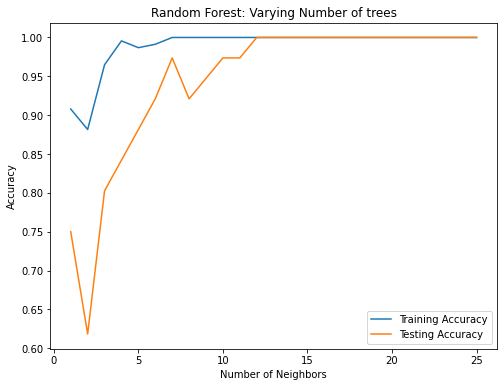

In [41]:
train_accuracies = {}
test_accuracies = {}
trees = np.arange(1, 26)
for n in trees:
    RF = RandomForestClassifier(n_estimators = n, criterion = 'entropy', random_state = 0)
    RF.fit(X_train, y_train)
    train_accuracies[n] = RF.score(X_train, y_train)
    test_accuracies[n] = RF.score(X_test, y_test)
    
plt.figure(figsize=(8, 6))
plt.title("Random Forest: Varying Number of trees")
plt.plot(trees, train_accuracies.values(), label="Training Accuracy")
plt.plot(trees, test_accuracies.values(), label="Testing Accuracy")
plt.legend()
plt.xlabel("Number of Neighbors")
plt.ylabel("Accuracy")
plt.show() 

In [42]:
# Training the Random Forest Classification model on the Training set
from sklearn.ensemble import RandomForestClassifier
RF_classifier = RandomForestClassifier(n_estimators = 12, criterion = 'entropy', random_state = 0)
RF_classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred_RF = RF_classifier.predict(X_test)

# Accuracy score
from sklearn.metrics import accuracy_score
random_forest_acc=accuracy_score(y_test,y_pred_RF)
print("Accuracy of Random Forest is : {:.2f} ".format(random_forest_acc))

Accuracy of Random Forest is : 1.00 


### K_means model

In [43]:
# Number of clusters
k= len(dataset["prognosis"].unique())
print("Number of clusters is : {}".format(k))

# Training the KMeans model on the Training set
from sklearn.cluster import KMeans
Kmeans = KMeans(n_clusters = k)
Kmeans.fit(X)
labels = Kmeans.labels_
prognosis_col = dataset["prognosis"] 
kmeans_result = prognosis_col
kmeans_result = kmeans_result.to_frame()
kmeans_result["y"] = y
kmeans_result["clusters"] = labels

# Accuracy score
from sklearn.metrics import accuracy_score
KMeans_acc=accuracy_score(kmeans_result["y"],kmeans_result["clusters"])
print("Accuracy of K-Means is : {:.2f} ".format(KMeans_acc))
print("The unsupervised lerning models can not be used in this types of problems.")

Number of clusters is : 41
Accuracy of K-Means is : 0.00 
The unsupervised lerning models can not be used in this types of problems.


### Show the accuracies in barchar and get the best model for this problem

The best models are:
1)KNN
2)Naive Bayes
3)Random Forest
with accuracy : 100.0%


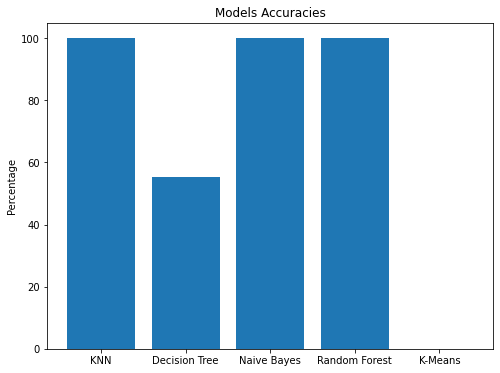

In [44]:
# Accuracies
Accuracies ={"KNN" : KNN_acc*100,
             "Decision Tree" : desision_tree_acc*100,
             "Naive Bayes" : naives_bayes_acc*100,
             "Random Forest" : random_forest_acc*100,
             "K-Means" : KMeans_acc*100} 

classifiers ={KNN_classifier : KNN_acc*100,
             DT_classifier : desision_tree_acc*100,
             NB_classifier : naives_bayes_acc*100,
             RF_classifier : random_forest_acc*100,
             Kmeans : KMeans_acc*100} 
best_acc = max(Accuracies.values())
label = []
for x in Accuracies:
    Accuracies[x]
    if(Accuracies.get(x)==best_acc):
      label.append(x)
if(len(label)>1):
    print("The best models are:")
    for i in range(len(label)):
        print("{}){}".format(i+1,label[i]))
    print("with accuracy : {}%".format(best_acc))    
else :    
    print("The best model is {} with accuracy : {}%".format(label,round(best_acc)))
best_classifier = list(classifiers.keys())[list(classifiers.values()).index(best_acc)]


# Visualising the accuracies 
plt.figure(figsize=(8,6))
plt.bar(range(len(Accuracies.keys())), Accuracies.values())
plt.title("Models Accuracies")
plt.ylabel("Percentage")
plt.xticks(range(len(Accuracies.keys())), Accuracies.keys())
plt.show()

<a id='test'></a>
## Testing the best model

In [45]:
a = list(range(1,132))
i_name  = (input('Enter your name :'))
i_age = (int(input('Enter your age:')))
for i in range(len(dataset.columns)-1):
    print(str(i+1) + ":", dataset.columns[i])
choices = input('Enter the Serial no.s which is your Symptoms are exist:  ')
b = [int(x) for x in choices.split()]
count = 0
while count < len(b):
    item_to_replace =  b[count]
    replacement_value = 1
    indices_to_replace = [i for i,x in enumerate(a) if x==item_to_replace]
    count += 1
    for i in indices_to_replace:
        a[i] = replacement_value
a = [0 if x !=1 else x for x in a]
y_diagnosis = best_classifier.predict([a])
y_pred_2 = best_classifier.predict_proba([a])
print(('Name of the infection = %s , confidence score of : = %s') %(y_diagnosis[0],y_pred_2.max()* 100),'%' )
print(('Name = %s , Age : = %s') %(i_name,i_age))

Enter your name :sdas
Enter your age:21
1: itching
2: skin_rash
3: nodal_skin_eruptions
4: continuous_sneezing
5: shivering
6: chills
7: joint_pain
8: stomach_pain
9: acidity
10: ulcers_on_tongue
11: muscle_wasting
12: vomiting
13: burning_micturition
14: spotting_ urination
15: fatigue
16: weight_gain
17: anxiety
18: cold_hands_and_feets
19: mood_swings
20: weight_loss
21: restlessness
22: lethargy
23: patches_in_throat
24: irregular_sugar_level
25: cough
26: high_fever
27: sunken_eyes
28: breathlessness
29: sweating
30: dehydration
31: indigestion
32: headache
33: yellowish_skin
34: dark_urine
35: nausea
36: loss_of_appetite
37: pain_behind_the_eyes
38: back_pain
39: constipation
40: abdominal_pain
41: diarrhoea
42: mild_fever
43: yellow_urine
44: yellowing_of_eyes
45: acute_liver_failure
46: swelling_of_stomach
47: swelled_lymph_nodes
48: malaise
49: blurred_and_distorted_vision
50: phlegm
51: throat_irritation
52: redness_of_eyes
53: sinus_pressure
54: runny_nose
55: congestion
56:

<a id='conclusions'></a>
## Conclusions

### Finally, we have answered two questions:
###   the first one is "is the unsupervised machine learning model can be used in this problem?"
###   the second one is "What is the best machine learning model for this problem?"